In [59]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

In [17]:
model = pybamm.BaseModel("height model")

# define parameters
w = pybamm.Parameter("Coating width [m]")
u_w = pybamm.Parameter("Web speed [ms-1]")
v = pybamm.Parameter("Volume flow [m3s-1]")
P= pybamm.Parameter("Pressure [Pa]")

# define variable
u = pybamm.Variable("Velocity  [ms-1]", domain = "coating")


# governing equations
model.variables["Coating thickness [m]"] = v / w / u_w
model.variables["Velocity  [ms-1]"] = u
model.algebraic[u] = pybamm.div(pybamm.grad(u))-P

model.boundary_conditions = {u: {"left": (1, "Dirichlet"), "right": (0, "Dirichlet")}}

# define geometry
r = pybamm.SpatialVariable(
    "r", domain=["coating"], coord_sys="cartesian"
)

geometry = {"coating": {r: {"min": pybamm.Scalar(0), "max": pybamm.Scalar(1)}}}

# mesh and discretise
submesh_types = {"coating": pybamm.Uniform1DSubMesh}
var_pts = {r: 20}


spatial_methods = {"coating": pybamm.FiniteVolume()}

#Add parameters
param = pybamm.ParameterValues(
    {
        "Coating width [m]": 1,
        "Web speed [ms-1]": "[input]",
        "Volume flow [m3s-1]": 1,
        "Pressure [Pa]": 1,
    }
)
values = [0.5,1,1.5,2,2.5,3,3.5,4,4.5,5]
thickness = []


# initial conditions
model.initial_conditions = {u: pybamm.Scalar(1)}


sim = pybamm.Simulation(model, parameter_values=param, geometry=geometry, submesh_types=submesh_types, spatial_methods=spatial_methods, var_pts=var_pts)
sol = sim.solve([0, 1], inputs={"Web speed [ms-1]":1})

sim.plot(["Velocity  [ms-1]"])

interactive(children=(FloatSlider(value=0.0, description='t', max=1.0, step=0.01), Output()), _dom_classes=('w…

Text(0.5, -0.15, 'Figure 1: Results of analytical modelling for (a) a velocity profile below the slot die region with different pressure heads using the Newtonian model')

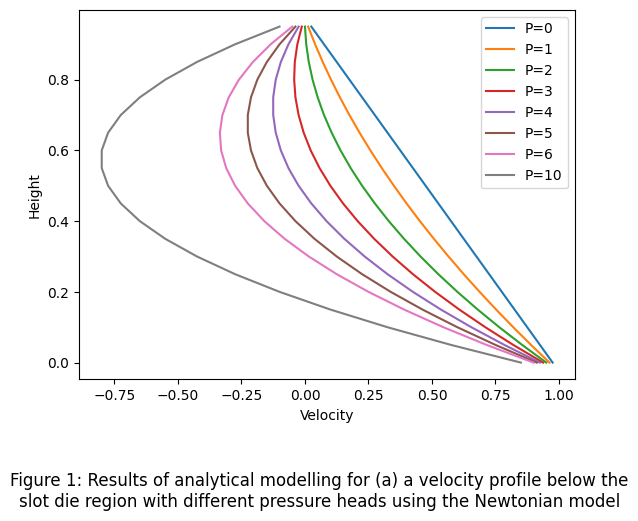

In [99]:
model = pybamm.BaseModel("height model")

# define parameters
P = pybamm.Parameter("Pressure [Pa]")

# define variable
u = pybamm.Variable("Velocity  [ms-1]", domain = "coating")

# governing equations
model.variables["Velocity  [ms-1]"] = u
model.algebraic[u] = pybamm.div(pybamm.grad(u))-P

# boundary conditions
model.boundary_conditions = {u: {"left": (1, "Dirichlet"), "right": (0, "Dirichlet")}}

# define geometry
r = pybamm.SpatialVariable(
    "r", domain=["coating"], coord_sys="cartesian"
)
geometry = {"coating": {r: {"min": pybamm.Scalar(0), "max": pybamm.Scalar(1)}}}

# mesh and discretise
submesh_types = {"coating": pybamm.Uniform1DSubMesh}
var_pts = {r: 20}


spatial_methods = {"coating": pybamm.FiniteVolume()}

#Add parameters
param = pybamm.ParameterValues(
    {
        "Pressure [Pa]": "[input]",
    }
)

values = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
normalised_values = [0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95]
pressure = [0,1,2,3,4,5,6,10]

# initial conditions
model.initial_conditions = {u: pybamm.Scalar(1)}

Coating_velocity = []

#Plots the solution to the model over a range of shear strain values for the given m value
for j in pressure:
    for i in values:
        sim = pybamm.Simulation(model, parameter_values=param, geometry=geometry, submesh_types=submesh_types, spatial_methods=spatial_methods, var_pts=var_pts)
        sol = sim.solve([0, 1], inputs={"Pressure [Pa]":j})
        Coating_velocity.append(sol["Velocity  [ms-1]"].entries[i][0])

    plt.plot(Coating_velocity, normalised_values, label = "P={}".format(j))
    Coating_velocity = []

#Figure labels
plt.legend()
plt.ylabel(r"Height")
plt.xlabel(r"Velocity")

#Figure caption
txt="Figure 1: Results of analytical modelling for a velocity profile below the slot die region with different pressure heads using the Newtonian model"
plt.figtext(0.5, -0.15, txt, wrap=True, horizontalalignment='center', fontsize=12)


Text(0.5, -0.15, 'Figure 1: Results of analytical modelling for (a) a velocity profile below the slot die region with different pressure heads using the Newtonian model')

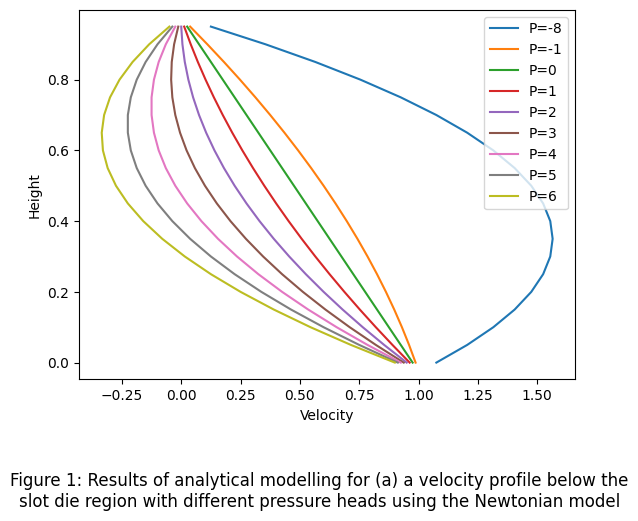

In [111]:
model = pybamm.BaseModel("height model")

# define parameters
P = pybamm.Parameter("Pressure [Pa]")
tau_y = pybamm.Parameter("Yield stress [Pa]")

# define variable
u = pybamm.Variable("Velocity  [ms-1]", domain = "coating")

# governing equations
model.variables["Velocity  [ms-1]"] = u
model.algebraic[u] = pybamm.div(pybamm.grad(u)-tau_y)-P

# boundary conditions
model.boundary_conditions = {u: {"left": (1, "Dirichlet"), "right": (0, "Dirichlet")}}

# define geometry
r = pybamm.SpatialVariable(
    "r", domain=["coating"], coord_sys="cartesian"
)
geometry = {"coating": {r: {"min": pybamm.Scalar(0), "max": pybamm.Scalar(1)}}}

# mesh and discretise
submesh_types = {"coating": pybamm.Uniform1DSubMesh}
var_pts = {r: 20}


spatial_methods = {"coating": pybamm.FiniteVolume()}

#Add parameters
param = pybamm.ParameterValues(
    {
        "Pressure [Pa]": "[input]",
        "Yield stress [Pa]": 3,
    }
)

values = np.arange(0,20)
normalised_values = values/20
pressure = [-8,-1,0,1,2,3,4,5,6]

# initial conditions
model.initial_conditions = {u: pybamm.Scalar(1)}

Coating_velocity = []

#Plots the solution to the model over a range of shear strain values for the given m value
for j in pressure:
    for i in values:
        sim = pybamm.Simulation(model, parameter_values=param, geometry=geometry, submesh_types=submesh_types, spatial_methods=spatial_methods, var_pts=var_pts)
        sol = sim.solve([0, 1], inputs={"Pressure [Pa]":j})
        Coating_velocity.append(sol["Velocity  [ms-1]"].entries[i][0])

    plt.plot(Coating_velocity, normalised_values, label = "P={}".format(j))
    Coating_velocity = []

#Figure labels
plt.legend()
plt.ylabel(r"Height")
plt.xlabel(r"Velocity")

#Figure caption
txt="Figure 1: Results of analytical modelling for (a) a velocity profile below the slot die region with different pressure heads using the Newtonian model"
plt.figtext(0.5, -0.15, txt, wrap=True, horizontalalignment='center', fontsize=12)
